# Netflix İnceleme
## Netflix 1. inceleme
### 1.Adım ilk olarak, veriyi tanıyın

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nfData = "netflix_watch.csv"
data = pd.read_csv(nfData)

In [3]:
print("veri tabanının şekli:", data.shape)

veri tabanının şekli: (20609, 8)


In [4]:
data.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,20576.000000,18945.000000,1.894500e+04
mean,2013.161693,6.398955,3.136480e+04
std,14.358143,1.098073,1.199187e+05
min,1913.000000,1.200000,5.000000e+00
25%,2011.000000,5.700000,3.250000e+02
50%,2018.000000,6.500000,1.579000e+03
75%,2021.000000,7.200000,1.000700e+04
max,2025.000000,9.500000,2.991460e+06


In [5]:
data.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,520476.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1232113.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,213209.0,"AD, AE, AG, AO, BH, BM, BS, BZ, CI, CM, CO, CR..."
3,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,447667.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1117918.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."


In [6]:
data.columns

Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')

### verilerinizin size yalan söylemediğinden emin ol

In [7]:
data.isnull().sum()

title                  612
type                     0
genres                 330
releaseYear             33
imdbId                1479
imdbAverageRating     1664
imdbNumVotes          1664
availableCountries       0
dtype: int64

In [8]:
data.dtypes

title                  object
type                   object
genres                 object
releaseYear           float64
imdbId                 object
imdbAverageRating     float64
imdbNumVotes          float64
availableCountries     object
dtype: object

In [9]:
data.duplicated().sum()
data.drop_duplicates(inplace = True)

### sorular sorun (birçok soru)

In [10]:
data["type"].value_counts()

type
movie    15703
tv        4801
Name: count, dtype: int64

In [11]:
genre_list = data["genres"].str.split(', ', expand=True).stack()

In [12]:
genre_list.unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Crime', 'Thriller', 'Biography',
       'Drama', 'War', 'Western', 'Romance', 'Mystery', 'Music', 'Sport',
       'Comedy', 'Animation', 'Horror', 'Family', 'Fantasy', 'History',
       'Musical', 'Documentary', 'Film-Noir', 'Short', 'News',
       'Game-Show', 'Reality-TV', 'TV Movie', 'Science Fiction',
       'Talk-Show', 'Adult', 'Reality', 'Kids', 'Sci-Fi & Fantasy',
       'Talk', 'Action & Adventure', 'War & Politics', 'Soap'],
      dtype=object)

In [13]:
len(genre_list.unique())

37

### görselleştir

In [14]:
data["genres_split"] = data["genres"].apply(lambda x: str(x).split(',') if pd.notnull(x) else [])

data_exploded = data.explode("genres_split")

data_exploded["genres_split"] = data_exploded["genres_split"].str.strip()


In [15]:
genre_count = data_exploded["genres_split"].value_counts()

In [16]:
genre_count

genres_split
Drama                 9471
Comedy                7191
Action                3293
Romance               2891
Crime                 2872
Adventure             2344
Documentary           2213
Animation             2069
Thriller              2044
Mystery               1394
Horror                1238
Family                1128
Fantasy                989
Biography              945
History                731
Music                  595
Sci-Fi                 492
Sport                  431
Reality-TV             336
War                    278
Short                  267
Musical                208
Game-Show               94
Kids                    84
Western                 62
Reality                 49
Talk-Show               39
Action & Adventure      30
Sci-Fi & Fantasy        27
Talk                    18
TV Movie                14
Science Fiction         14
News                    10
Film-Noir               10
Soap                     5
War & Politics           2
Adult          

In [17]:
data["genres_split"] = data["genres"].apply(lambda x: str(x).split(',') if pd.notnull(x) else [])

data_exploded = data.explode("genres_split")

data_exploded["genres_split"] = data_exploded["genres_split"].str.strip()

genre_count = data_exploded['genres_split'].value_counts()


In [18]:
genre_count

genres_split
Drama                 9471
Comedy                7191
Action                3293
Romance               2891
Crime                 2872
Adventure             2344
Documentary           2213
Animation             2069
Thriller              2044
Mystery               1394
Horror                1238
Family                1128
Fantasy                989
Biography              945
History                731
Music                  595
Sci-Fi                 492
Sport                  431
Reality-TV             336
War                    278
Short                  267
Musical                208
Game-Show               94
Kids                    84
Western                 62
Reality                 49
Talk-Show               39
Action & Adventure      30
Sci-Fi & Fantasy        27
Talk                    18
TV Movie                14
Science Fiction         14
News                    10
Film-Noir               10
Soap                     5
War & Politics           2
Adult          

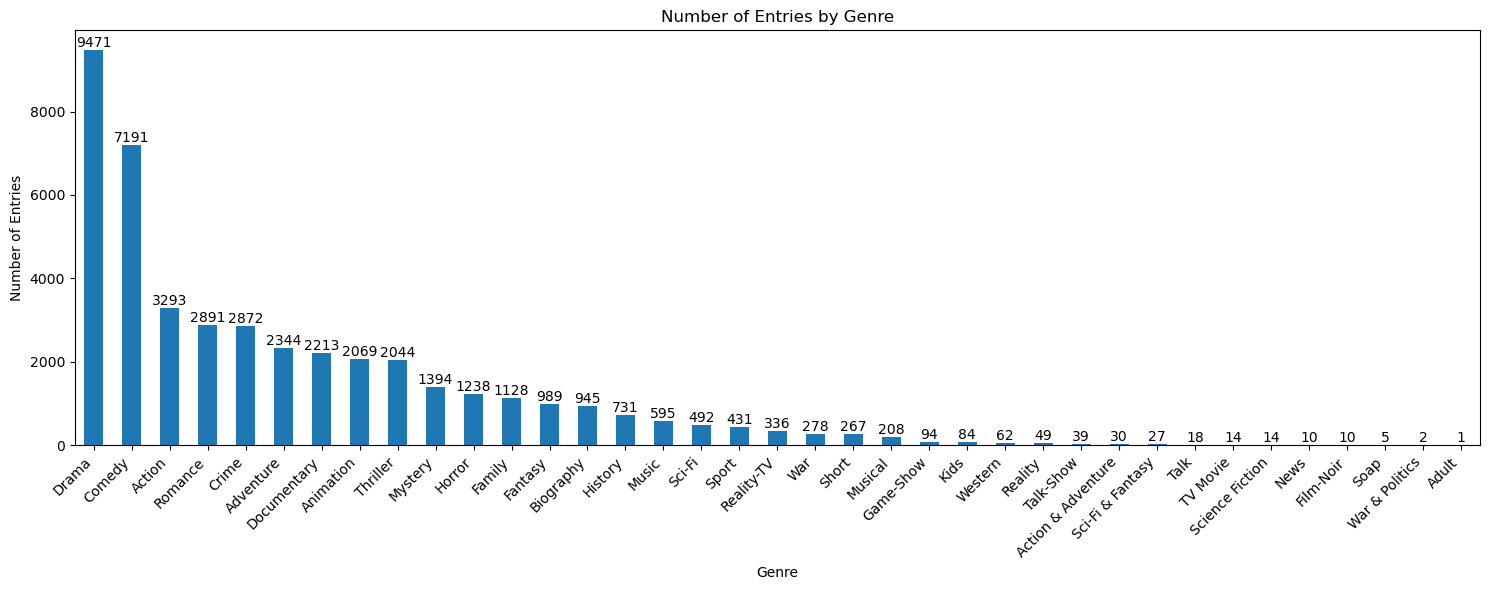

In [19]:
plt.figure(figsize=(15, 6))
ax = genre_count.plot(kind='bar')
for i, count in enumerate(genre_count):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)
plt.title('Number of Entries by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


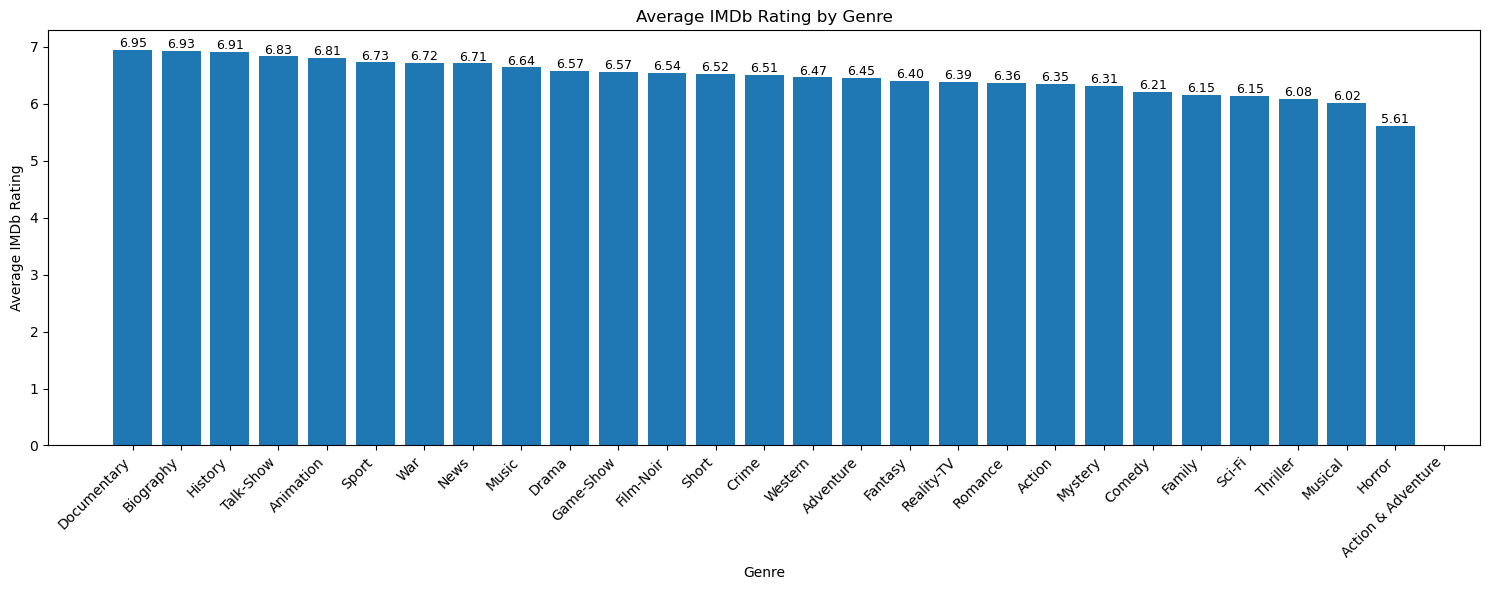

In [20]:
data_exploded = data_exploded.reset_index(drop=True)
genre_ratings = data_exploded.groupby('genres_split')['imdbAverageRating'].mean()
sorted_genre_ratings = genre_ratings.sort_values(ascending=False)
plt.figure(figsize=(15, 6))
bars = plt.bar(sorted_genre_ratings.index, sorted_genre_ratings.values)
for bar, value in zip(bars, sorted_genre_ratings.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f"{value:.2f}", 
             ha='center', fontsize=9)
plt.xlabel('Genre')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
release_year_counts = data['releaseYear'].value_counts().head(20)
release_year_counts

releaseYear
2022.0    1968
2023.0    1796
2021.0    1577
2019.0    1476
2018.0    1446
2020.0    1376
2024.0    1267
2017.0    1120
2016.0     928
2015.0     753
2014.0     625
2013.0     532
2012.0     430
2011.0     386
2010.0     347
2009.0     323
2008.0     287
2006.0     270
2007.0     269
2005.0     251
Name: count, dtype: int64

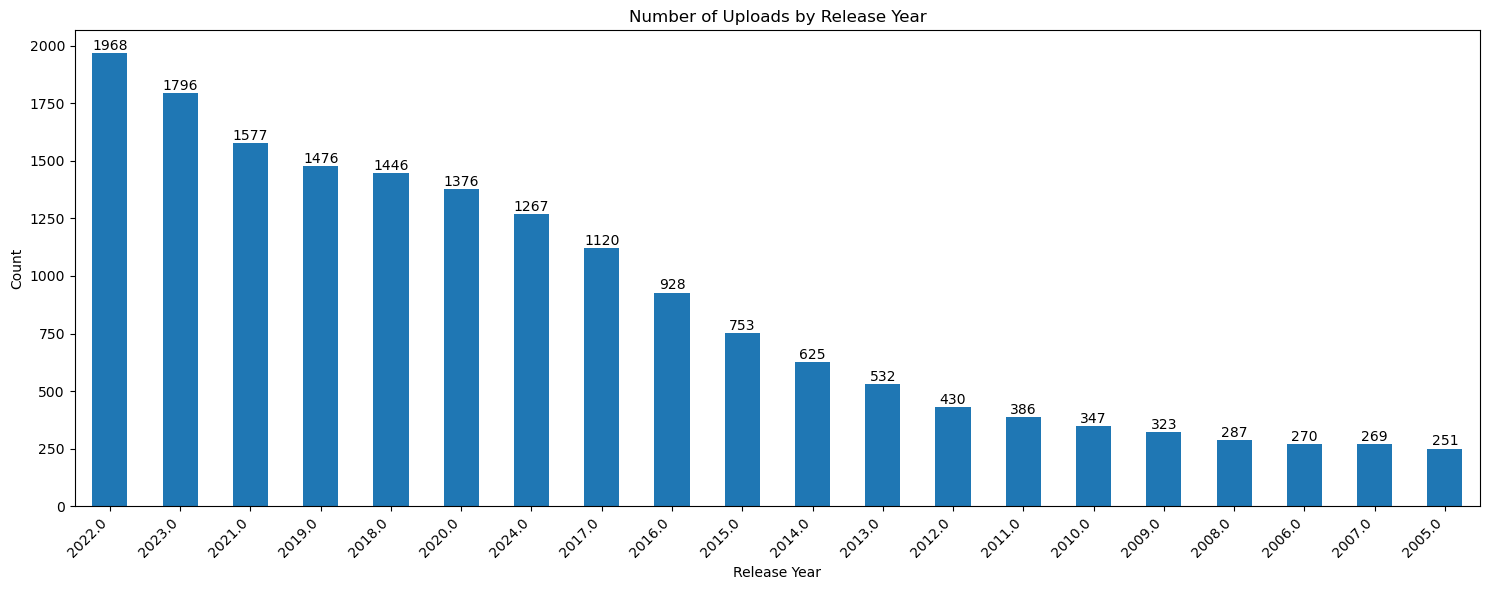

In [22]:
plt.figure(figsize=(15, 6))
ax = release_year_counts.plot(kind='bar')
for i, count in enumerate(release_year_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)
plt.title('Number of Uploads by Release Year')
plt.ylabel('Count')
plt.xlabel('Release Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()    

### Sonuçları not al

#### Gözlemler

Veri kümesi 20.601 satır ve 8 sütundan oluşmaktadır.
'Tür' sütunu virgülle ayrılmış birden fazla tür içerir.
Çoğu sütunda bazı boş değerler bulunsa da boş değerlerin yüzdesi nispeten düşüktür. 'imdbAverageRating' ve 'imdbNumVotes' sütunları en yüksek boş değer yüzdesine sahiptir, ardından 'imdbId' sütunu gelir.
Her sütunun veri türleri uygun görünmektedir.
Veri kümesinde 105 yinelenen satır vardır.
Netflix'teki içerik türlerinin dağılımı şu şekildedir: İçeriğin %75'i filmlerden oluşurken, %23'ü TV şovlarından oluşmaktadır.
Veri kümesinde 37 benzersiz tür bulunmaktadır ve içeriğin çoğunluğu Dram (9468) kategorisine girerken, ardından Komedi (7189) gelmektedir. En yüksek puan alan ilk 5 tür Belgesel (6,95), Biyografi (6,93), Tarih (6,91), Talk Show (6,83) ve Animasyon (6,81)
Yıllık yükleme sayısı 2006 yılından (270) 2022 yılına (1969 yükleme) kadar artmıştır